In [48]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause
# The following workshop is a more in-depth tutorial based off of the MNIST tutorial from sklearn

# Workshop 1 - Classification of Handwritten Digits from MNIST Dataset

### The objective of the workshop is to learn a simple machine learning workflow in order to solve a classic machine learning problem: classifying handwritten digits from 0-9

#### Import some bread and butter libraries in Python

In [30]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, neural_network,metrics

#### Load the MNIST digits dataset

In [31]:
digits = datasets.load_digits()

#### Inspect the dataset-  Knowing what format the data is presented in and how it was generated can give insight on creating better models. The dataset in this workshop is a very popular one used for digit classification, and sklearn has formatted it into their own object type. As seen here, data is split into different "fields".

In [32]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

#### Format data into feature variables and target variables list

In [33]:
images_and_labels = list(zip(digits.images, digits.target))

In [34]:
images_and_labels[0]

(array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
        [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
        [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
        [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
        [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
        [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
        [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
        [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]]), 0)

#### The data that we are interested in is made up of 8x8 images of digits, let's have a look at the first 4 images, stored in the "images" attribute of the dataset.  NOTE: If we were working from image files, we could load them usingmatplotlib.pyplot.imread.  Notice that each image must have the same size. For these images, we know which digit they represent: it is given in the "target" of the dataset.

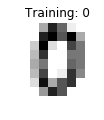

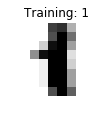

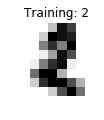

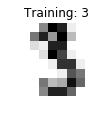

In [44]:
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.show()

#### In order to feed the image data into a classifier, we flatten each image matrix into a vector

In [46]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#### Below, we verify the shape of the first sample to see if we have correctly flattened the image matrix into a vector.

In [50]:
data[0].shape 

(64,)

####  Import classifier from sklearn initialize. We will use an "SVM" (support vector machine), which will be described more in depth later in the course. In sklearn, this is reduced to a simple function call.

In [58]:
classifier = svm.SVC(gamma=0.001, verbose=True)
# classifier = neural_network.MLPClassifier(hidden_layer_sizes=(256, 256,128,256,512,), verbose=True)

#### We then fit the data into the classifier, using the following format: clf.fit(X, Y), where X is the feature matrix and Y is the target variable. Note that the number of samples in the feature matrix must correspond to the number of samples in Y.

In [59]:
# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

#### Using the classifier, predict on the rest of the data

In [56]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

#### Classification report includes classfication metrics used, notably precision, recall, f1, and support

In [61]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




#### Print out the confusion matrix to see which classes are incorrectly classified

In [63]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


### Print out some of the predictions and some of their corresponding images

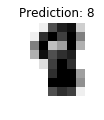

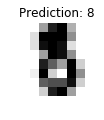

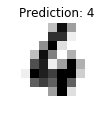

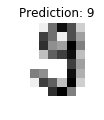

In [64]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

    plt.show()

### Some things to play with during workshop, try changing the train_test split, create pivot variable to make code more legible, create parameters that can be changed so that users can easily change the model and evaluate the workflow

In [29]:
# Seeing is believing, sample a head of around 20 examples, between the expected output vs the predictions made by each
# classifier

In [30]:
# import a few classifiers, so that people can explore what those are